In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

In [72]:
df = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])

In [73]:

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

y = df['target']
x = df.drop(['target'],axis=1)

x = StandardScaler().fit_transform(x)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [75]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


<IPython.core.display.Javascript object>


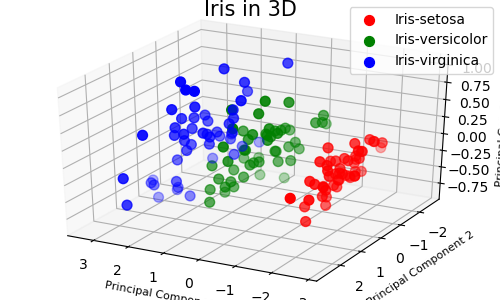

In [77]:
fig = plt.figure(1, figsize=(5, 3))

ax = Axes3D(fig,  elev=50, azim=130)

ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_zlabel('Principal Component 3', fontsize = 8)
ax.set_title('Iris in 3D', fontsize = 15)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    tar = finalDf['target'] == target
    ax.scatter(finalDf.loc[tar, 'principal component 1'], finalDf.loc[tar, 'principal component 2']
               , finalDf.loc[tar, 'principal component 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()